# Data mining project

## Imports

In [49]:
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, TargetEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier


## Loading data

In [50]:
train_path = "./data/train.csv" # path for the training data
train_data = pd.read_csv(train_path) # reading csv using pandas

test_path = "./data/test.csv"
test_data = pd.read_csv(test_path)

In [51]:
# extract the relevant information about the group from the passenger id
train_data["PassengerGroup"] = train_data["PassengerId"].apply(lambda x: int(x[0:4]))
test_data["PassengerGroup"] = test_data["PassengerId"].apply(lambda x: int(x[0:4]))

## Decision tree model


### Preprocessing data

In [52]:
# get the target and label values from the loaded training data table 
# not all columns are relevant, for example name is probably not important or doesn't have 
# a clear association to the outcome and in fact, including it will reduce our score on kaggle.

X_train = train_data[["PassengerGroup", "HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].values
y_train = train_data["Transported"].values

# encode the values to make them readable by the decision tree classifier
te = TargetEncoder()

X_train = te.fit_transform(X_train, y_train)


### Fitting the classifier

In [53]:

# fit the classifier using the transformed data
classifier = tree.DecisionTreeClassifier(max_depth=5)
classifier = classifier.fit(X_train, y_train)


### Plotting the tree

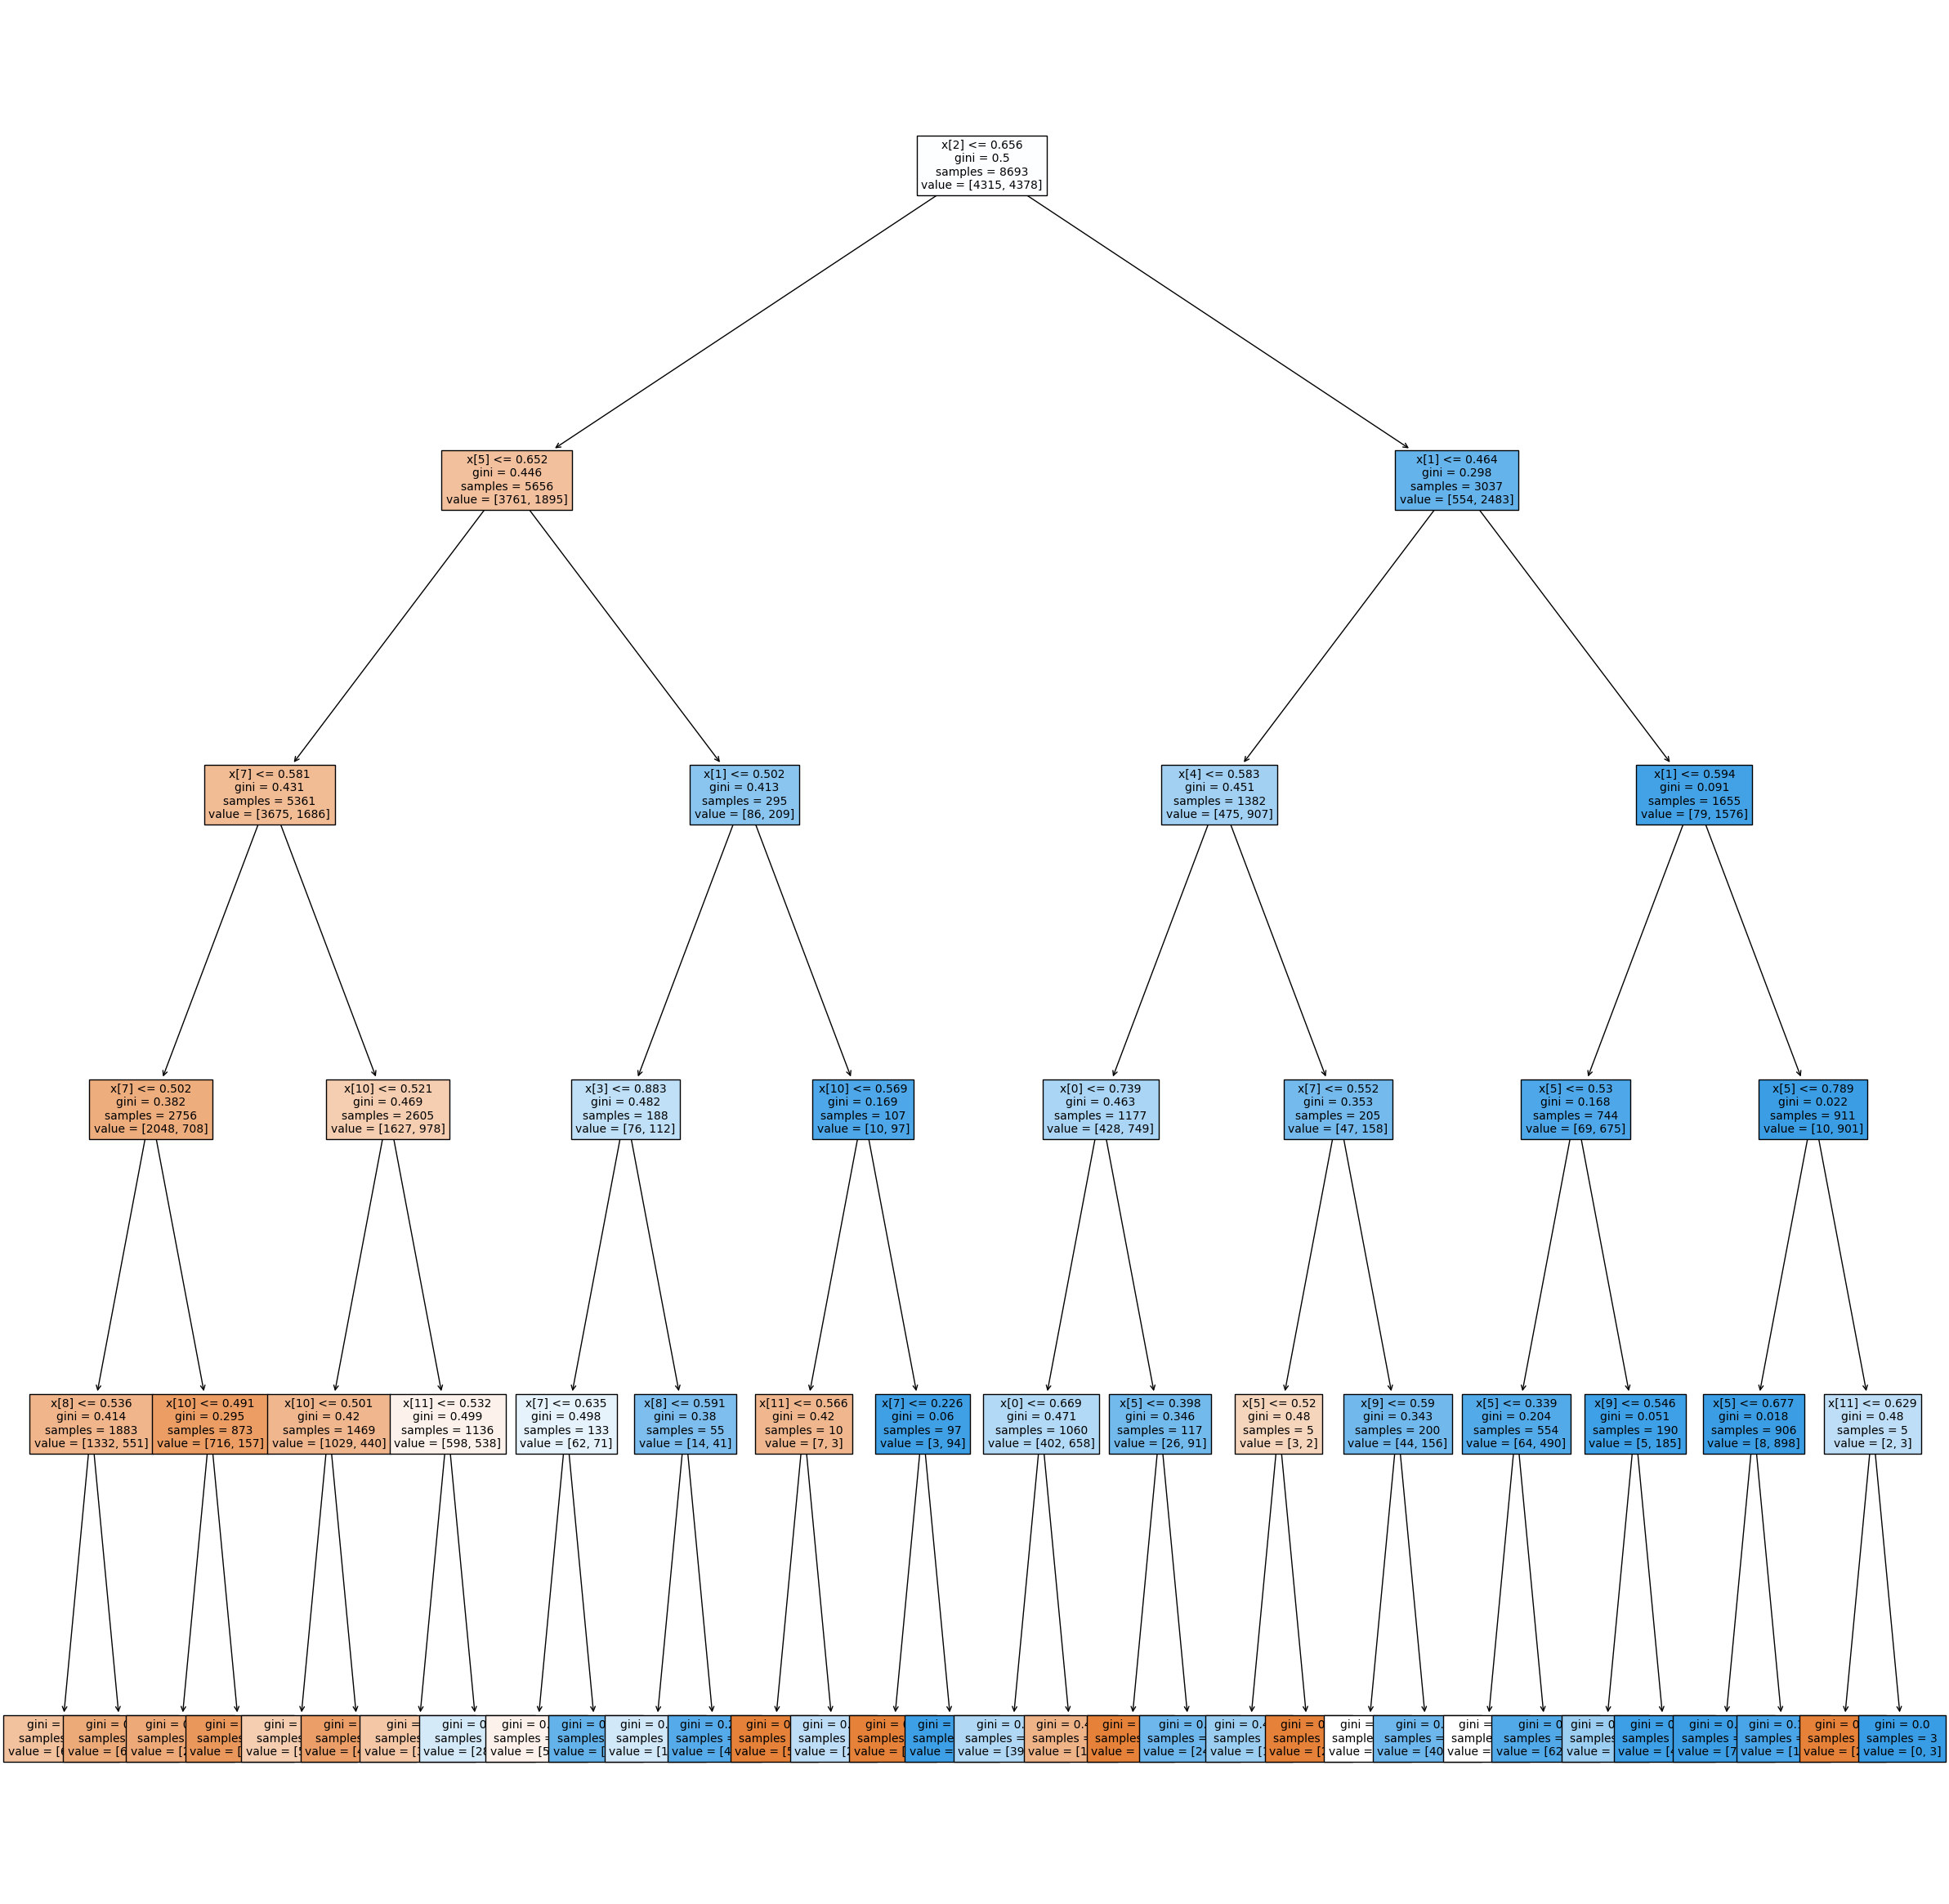

In [54]:
# tree is plotted using transformed values, may be difficult to display original attribute names and values
plt.figure(figsize=(30,30))
tree.plot_tree(classifier, fontsize=10, filled=True)
plt.show()

### Making and saving the predictions

In [55]:
# get the target values from the loaded test data table 
# but not label as the whole point is that it is not avalable in the test data set

X_test = test_data[["PassengerGroup", "HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].values
X_test = te.transform(X_test)

#classifier.predict(X_test) # make the predictions

# "zip" each prediction with respective passenger id
predictions = pd.DataFrame(data=zip(test_data['PassengerId'].values, classifier.predict(X_test)), columns=["PassengerId","Transported"]).set_index("PassengerId")

# write table in csv
predictions.to_csv("./data/actual_submission_tree.csv") 


## Neural network

### Preprocessing data

In [56]:
# get the target and label values from the loaded training data table 
# not all columns are relevant, for example name is probably not important or doesn't have 
# a clear association to the outcome and in fact, including it will reduce our score on kaggle.

X_train = train_data[["PassengerGroup", "HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].values
y_train = train_data["Transported"].values

# encode the values to make them readable by the neural network
te = TargetEncoder()

X_train = te.fit_transform(X_train, y_train)

# get the target values from the loaded test data table 
# but not label as the whole point is that it is not avalable in the test data set

X_test = test_data[["PassengerGroup", "HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].values
X_test = te.transform(X_test)


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Defining and training the network

In [57]:
#5x5 network performed better than 15x15
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1, max_iter=10000)
classifier.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), max_iter=10000,
              random_state=1, solver='lbfgs')

### Saving the predictions

In [58]:

# "zip" each prediction with respective passenger id
predictions = pd.DataFrame(data=zip(test_data['PassengerId'].values, classifier.predict(X_test)), columns=["PassengerId","Transported"]).set_index("PassengerId")

# write table in csv
predictions.to_csv("./data/actual_submission_neural.csv") 
